Question 1

In [1]:
 # Libraries
import pandas as pd

In [2]:
 # Reading dataset and printing head
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(link, sep = "|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
 # Grouping data by column occupation and finding age mean by group
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [12]:
 # Function or filter for getting only males
def gender(var):
    if var == 'M':
        return True
    else:
        return False

In [13]:
 # Applying filter for male gender
users['maleOnly'] = users['gender'].apply(gender)

In [14]:
 # Grouping number of male in each occupation and counting
maleNo = users.groupby('occupation')['maleOnly'].sum()
maleNo

occupation
administrator     43
artist            15
doctor             7
educator          69
engineer          65
entertainment     16
executive         29
healthcare         5
homemaker          1
lawyer            10
librarian         22
marketing         16
none               5
other             69
programmer        60
retired           13
salesman           9
scientist         28
student          136
technician        26
writer            26
Name: maleOnly, dtype: int64

In [15]:
 # Grouping number of total people in each occupation and counting
totalNo = users.groupby('occupation').gender.count()
totalNo

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64

In [16]:
 # Finding ratio and sorting them descending
ratio = maleNo/totalNo
ratioSort = ratio.sort_values(ascending = False)
ratioSort

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [17]:
 # For each occupation, calculating the minimum age
users.groupby('occupation').age.min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [18]:
 # For each occupation, calculating the maximum age
users.groupby('occupation').age.max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [11]:
 # For each combination of occupation and sex, calculate the mean age 
users.groupby([ 'occupation' , 'gender' ])[ 'age' ].mean ()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [19]:
# For each occupation calculating the percentage of women and men 
# Creating data which count total people related to each gender in each occupation
gender_vise_People = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
gender_vise_People

gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              M            9
scientist     F            3
              M           28
student       F           60
              M          136
technician    F            1
              M           26
writer        F           19
              M           26

In [20]:
# Creating data which count total people in each occupation
occupationPeople = users.groupby(['occupation']).count()
occupationPeople

,user_id,age,gender,zip_code,males,maleOnly
occupation,,,,,,
administrator,79,79,79,79,79,79
artist,28,28,28,28,28,28
doctor,7,7,7,7,7,7
educator,95,95,95,95,95,95
engineer,67,67,67,67,67,67
entertainment,18,18,18,18,18,18
executive,32,32,32,32,32,32
healthcare,16,16,16,16,16,16
homemaker,7,7,7,7,7,7


In [14]:

# Calculating the percentage by each gender
percentageBygender = gender_vise_People.div(occupationPeople, level = "occupation") * 100
percentageBygender.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [21]:
 # Libraries
import pandas as pd
import numpy as np

In [22]:
euro12=pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv",sep=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [23]:
# Only Goal Column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [24]:
# Getting unique teams
euro12.Team.nunique()

16

In [25]:
# Number of columns
len(euro12.columns)

35

In [26]:
# Dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [27]:
# Sorting first by red cards then by yellow cards
sortRed = discipline.sort_values(by='Red Cards')
sortRed

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0
8,Netherlands,5,0
10,Portugal,12,0
12,Russia,6,0


In [28]:
sortYellow = discipline.sort_values(by='Yellow Cards')
sortYellow

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


In [29]:
# Mean Yellow Cards to team
discipline['Yellow Cards'].mean()

7.4375


# Question 3

In [30]:
 # Libraries
import random
import pandas as pd
import numpy as np

In [31]:
 # First Series
series1 = pd.Series(np.random.randint(1,5,100))
series1

0     3
1     3
2     1
3     2
4     2
     ..
95    4
96    3
97    3
98    3
99    3
Length: 100, dtype: int32

In [32]:
 # Second Series
series2 = pd.Series(np.random.randint(1,4,100))
series2

0     3
1     1
2     2
3     1
4     1
     ..
95    1
96    2
97    3
98    1
99    3
Length: 100, dtype: int32

In [33]:
 # Third Series
series3 = pd.Series(np.random.randint(10000,30000,100))
series3

0     21373
1     13384
2     14609
3     27777
4     28187
      ...  
95    12185
96    14815
97    14104
98    16087
99    24692
Length: 100, dtype: int32

In [34]:
 # Joining all series by column and creating data frame
dataFrame1 = pd.concat([series1, series2, series3], axis = 1)
dataFrame1

,0,1,2
0,3,3,21373
1,3,1,13384
2,1,2,14609
3,2,1,27777
4,2,1,28187
...,...,...,...
95,4,1,12185
96,3,2,14815
97,3,3,14104
98,3,1,16087


In [35]:
 # Changing names of the columns
dataFrame1.columns = ['bedrs','bathrs','price_sqr_meter']
dataFrame1

,bedrs,bathrs,price_sqr_meter
0,3,3,21373
1,3,1,13384
2,1,2,14609
3,2,1,27777
4,2,1,28187
...,...,...,...
95,4,1,12185
96,3,2,14815
97,3,3,14104
98,3,1,16087


In [36]:
bigcolumn = pd.concat([series1, series2, series3], axis = 0)
bigcolumn

0         3
1         3
2         1
3         2
4         2
      ...  
95    12185
96    14815
97    14104
98    16087
99    24692
Length: 300, dtype: int32

In [37]:
 # Calculating total
len(bigcolumn) # True

300

In [38]:
bigcolumn.index = range(0, 300)
bigcolumn

0          3
1          3
2          1
3          2
4          2
       ...  
295    12185
296    14815
297    14104
298    16087
299    24692
Length: 300, dtype: int32

# Question 4

In [39]:
 # Libraries
import pandas as pd
import datetime

In [41]:
 # Reading dataset, appling first 3 columns to proper date time frame and printing values
data=pd.read_csv('C:\BDAT Sem 1\data programming 1004\\wind.txt',sep="\s+",parse_dates=[[0,1,2]])

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [42]:
# Data from 2061
# Function for fixning
def fixYears(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)



In [43]:
 # Applying function and prinitng values
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(fixYears)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [44]:
 # Setting right index for date
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [45]:
 # Missing values count
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [46]:
 # Non missing values
data.shape[0]-data.isnull().sum() 

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [47]:
 # Mean wind speed
data.mean().mean() 

10.227982360836924

In [48]:
 # Creating datafram loc_stats and computing min, max, mean and std of windspeeds over all days
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [49]:
 # Creating datafram day_stats and computing min, max, mean and std of windspeeds
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [50]:
 # Mean windspeed in January
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
janWinds=data.query('month==1')
janWinds
janWinds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [152]:
 # Yearly frequency
data.query('month == 1 and day == 1') 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


In [51]:
 # Monthly frequency
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


In [52]:
 # Weekly frequency
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000,1.000000,1961.0,1.000000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571,1.000000,1961.0,5.000000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,1.000000,1961.0,12.000000
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286,1.000000,1961.0,19.000000
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000,1.000000,1961.0,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571,11.428571,1978.0,17.142857
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429,12.000000,1978.0,7.000000
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857,12.000000,1978.0,14.000000


In [53]:
data1961 = data[data.index < pd.to_datetime('1962-01-01')]
data1961.resample('W').mean()
data1961.resample('W').min()
data1961.resample('W').max()
data1961.resample('W').std()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062,0.000000,0.0,2.160247
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355,0.000000,0.0,2.160247
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239,0.000000,0.0,2.160247
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721,0.000000,0.0,2.160247
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104,0.487950,0.0,13.483676
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705,0.000000,0.0,2.160247
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377,0.000000,0.0,2.160247
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283,0.000000,0.0,2.160247


# Question 5

In [54]:
 # Libraries
import pandas as pd

In [55]:
 # Reading dataset and printing first 10 values
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(link, sep = "\t")
chipo[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [56]:
 # No of observations
len(chipo)

4622

In [57]:
 # No of columns
len(chipo.columns)

5

In [58]:
 # Names of columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [59]:
 # Index
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [60]:
    # Grouping by item name, then sum each item orders, arranging descending and getting topmost index for its name
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).index[0]

'Chicken Bowl'

In [61]:
    # Grouping by item name, then sum each item orders, arranging descending and getting topmost
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [62]:
    # Grouping by choice description, then sum each item orders, arranging descending and getting topmost index for its name
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]


'[Diet Coke]'

In [63]:
 # Total items
chipo.quantity.sum()

4972

In [64]:
 # Function for converting to float
def convert_to_float(num):
    return float(num[1:-1])

In [65]:
 #Checking type
chipo.dtypes.item_price

dtype('O')

In [66]:
# Creating lambda function and applying to item prices and dispalying
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [67]:
 # Checking type
chipo.dtypes.item_price

dtype('float64')

In [68]:
 # Calculating revenue by item by multiplying quantity by price than summing up total revenue
chipo['revenuebyItem'] = chipo['quantity']*chipo.item_price
totalReveneue = chipo.revenuebyItem.sum()
totalReveneue

39237.02

In [69]:
 # Gettng unique orders
totalOrders = chipo.order_id.nunique()

In [70]:
 # Mean Revenue
chipo.groupby(by=['order_id']).sum().mean()['revenuebyItem']


21.394231188658654

In [71]:
 # Counting unique items sold
chipo.item_name.nunique()

50

# Question 6

In [72]:
 # Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
 # Loading data
data = pd.read_csv('C:\BDAT Sem 1\data programming 1004\\us-marriages-divorces-1867-2014.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 1000x800 with 0 Axes>

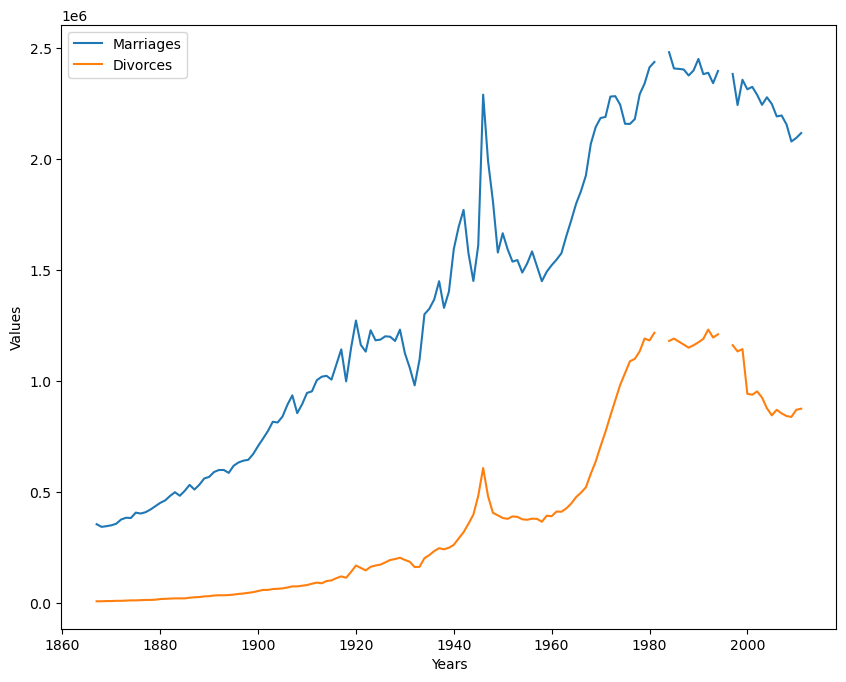

In [176]:
plt.figure()
data.plot('Year',y=['Marriages','Divorces'])
plt.ylabel('Values')
plt.xlabel("Years")
plt.show()


# Question 7

In [75]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [76]:
 # Loading data
marriage=pd.read_csv('C:\BDAT Sem 1\data programming 1004\\us-marriages-divorces-1867-2014.csv')
marriage.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [77]:
year=marriage.Year.values
marraige=marriage.Marriages_per_1000.values
divorce=marriage.Divorces_per_1000.values

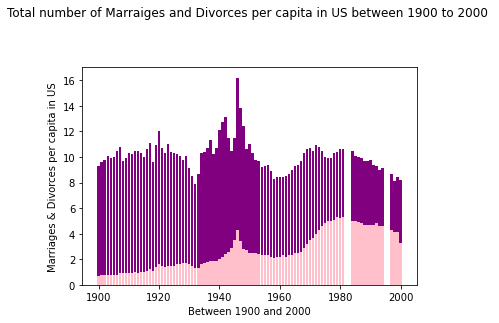

In [79]:
years_1900=marriage.Year>=1900
years_2000=marriage.Year<=2000
Data_1900_2000=marriage[years_1900 & years_2000]
plt.bar(Data_1900_2000['Year'],Data_1900_2000['Marriages_per_1000'],color="purple")
plt.bar(Data_1900_2000['Year'],Data_1900_2000['Divorces_per_1000'],color="pink")
plt.title("Total number of Marraiges and Divorces per capita in US between 1900 to 2000 \n\n\n")
plt.xlabel("Between 1900 and 2000")
plt.ylabel("Marriages & Divorces per capita in US")
 
# Show graph
plt.show()

# Question 8

In [80]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [81]:
 # Loading data
data = pd.read_csv('C:\BDAT Sem 1\data programming 1004\\actor_kill_counts.csv')
data.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [82]:
data = data.sort_values('Count', ascending = True)
actorNames = data['Actor'].values
kills = data['Count'].values

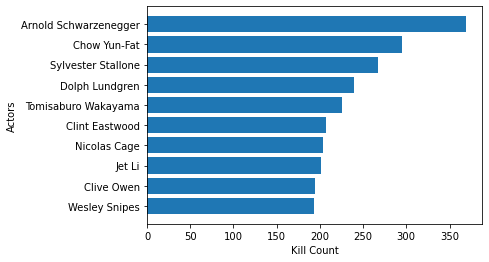

In [83]:
plt.barh(actorNames, kills)
plt.ylabel("Actors")
plt.xlabel("Kill Count")
plt.show()

# Question 9

In [84]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [86]:
 # Loading data
data = pd.read_csv('C:\BDAT Sem 1\data programming 1004\\roman-emperor-reigns.csv')
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [87]:
killedEmperors = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
killedEmperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
5,Galba,0.58,Assassinated


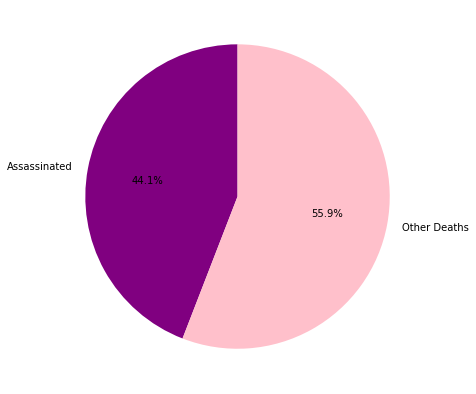

In [88]:
fig = plt.figure(figsize =(10, 7))
colors=['purple', 'pink']
plt.pie([len(killedEmperors),len(data) - len(killedEmperors)], labels = ['Assassinated', 'Other Deaths'],  colors=colors, startangle=90, autopct='%1.1f%%')
 
# show plot
plt.show()

# Question 10

In [89]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [90]:
 # Loading data
data = pd.read_csv('C:\BDAT Sem 1\data programming 1004\\arcade-revenue-vs-cs-doctorates.csv')
data.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [91]:
arcadeRevenue = data['Total Arcade Revenue (billions)'].values
csDocAwardes = data['Computer Science Doctorates Awarded (US)'].values

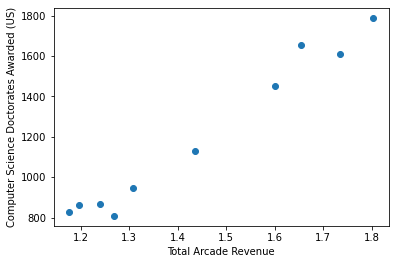

In [92]:
plt.scatter(arcadeRevenue, csDocAwardes)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()